<a href="https://colab.research.google.com/github/AnthonyAngatia/ML-Group-Final-Task/blob/main/Coronavirus_tweet_multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Corona Virus Tweets

This task involves classifying tweets tweeted regarding the pandemic. It is a multiclass classification task involving into **3 categories:**

*   Positive
*   Negative
*   Neutral

The dataset used is from a kaggler Aman Miglani. Here is the link: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

## Group members

* Harry Karani

* Stephanie Mboya

* Angatia Anthony



In [1]:
import pandas as pd
import numpy as np
import unicodedata
import nltk
nltk.download('stopwords')
import seaborn as sns


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.models import load_model
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_file = '/content/drive/Othercomputers/My PC/ICS/Year 4/Semester 1/Machine Learning/Coronavirus tweets/Corona_NLP_train.csv'
test_file = '/content/drive/Othercomputers/My PC/ICS/Year 4/Semester 1/Machine Learning/Coronavirus tweets/Corona_NLP_test.csv'
train_dataset = pd.read_csv(train_file, encoding='latin1')
test_dataset = pd.read_csv(test_file, encoding='latin1')
train_dataset.head(7)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [4]:
print( train_dataset.shape)
print(test_dataset.shape)

(41157, 6)
(3798, 6)


In [5]:
train_dataset = train_dataset[['OriginalTweet', 'Sentiment' ]]
test_dataset = test_dataset[['OriginalTweet', 'Sentiment' ]]
test_dataset

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


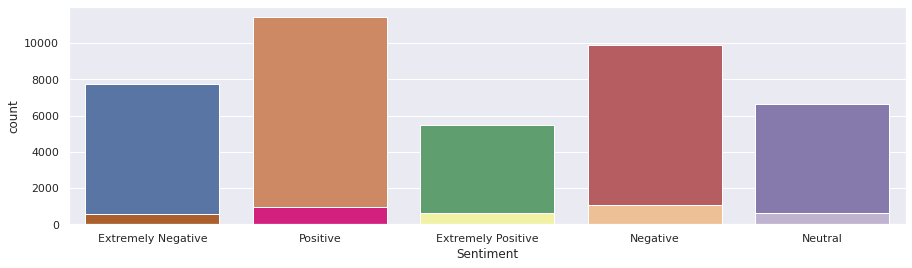

In [6]:
# Distribution of the sentiments
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,4)})
sns.countplot(train_dataset['Sentiment'])
sns.countplot(test_dataset['Sentiment'], palette = "Accent_r")

Due to the size of the dataset, we opted to reduce the classes into 3 classes so as to improve the accuracy of the model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


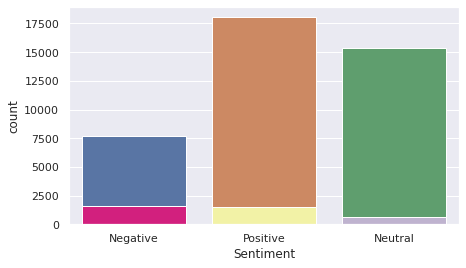

In [7]:

def category_converter(category):
  if category == "Extremely Negative":
    return "Negative"
  elif category == "Extremely Positive":
    return "Positive"
  return category
train_dataset["Sentiment"] = train_dataset["Sentiment"].apply(category_converter)
test_dataset["Sentiment"] = test_dataset["Sentiment"].apply(category_converter)
sns.set(rc={'figure.figsize':(7,4)})
sns.countplot(train_dataset['Sentiment'])
sns.countplot(test_dataset['Sentiment'], palette = "Accent_r")


## Data preprocessing


In [8]:
# Check for null rows
train_dataset.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [9]:
def remove_hyperlinks(tweet):
  return re.sub(r'http\S+', '', tweet)


In [10]:
def remove_tags(tweet):
  return re.sub(r"@([a-zA-Z0-9_.-]{1,100})", " ", tweet)


In [11]:
def remove_stopwords(tweet):
  return ' '.join([word for word in tweet.split() if word not in stopwords.words("english")])


In [12]:
def more_cleaning(tweet):
  tweet = re.sub(r"\d+", " ", tweet)# Remove numbers
  tweet = unicodedata.normalize("NFD", tweet).encode('ascii', 'ignore').decode("utf-8")# Encode special characters
  tweet = re.sub(r'[^\w\s]', ' ', tweet)# Remove punctuations
  return tweet


In [13]:
train_dataset["OriginalTweet"] = train_dataset["OriginalTweet"].apply(remove_hyperlinks)
train_dataset["OriginalTweet"] = train_dataset["OriginalTweet"].apply(remove_tags)
train_dataset["OriginalTweet"] = train_dataset["OriginalTweet"].apply(remove_stopwords)
train_dataset["OriginalTweet"] = train_dataset["OriginalTweet"].apply(more_cleaning)
train_dataset.sample(5)


,OriginalTweet,Sentiment
24061,Companies are evaluating their businesses inc...,Positive
39024,From hemp to hand sanitizer Alabama veteranAs...,Positive
37328,During a time when there has been unpreceden...,Negative
41053,China amp US Share S P Outcomes China losing w...,Positive
13590,Me in supermarket Look at that idiot buying a ...,Negative


In [14]:
test_dataset["OriginalTweet"] = test_dataset["OriginalTweet"].apply(remove_hyperlinks)
test_dataset["OriginalTweet"] = test_dataset["OriginalTweet"].apply(remove_tags)
test_dataset["OriginalTweet"] = test_dataset["OriginalTweet"].apply(remove_stopwords)
test_dataset["OriginalTweet"] = test_dataset["OriginalTweet"].apply(more_cleaning)
test_dataset.head(5)

,OriginalTweet,Sentiment
0,TRENDING New Yorkers encounter empty supermar...,Negative
1,When I couldn t find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,Panic buying hits NewYork City as anxious sh...,Negative
4,toiletpaper dunnypaper coronavirus coronav...,Neutral


In [15]:
# One hot encoding the sentiments and converting the OriginalTweet to a numpy array for tokenization
X_train, y_train = train_dataset['OriginalTweet'].values, pd.get_dummies(train_dataset['Sentiment'].values).values
X_test, y_test = test_dataset['OriginalTweet'].values, pd.get_dummies(test_dataset['Sentiment'].values).values

In [16]:
tokenizer = Tokenizer()

In [17]:
tokenizer.fit_on_texts(list(X_train))

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)

In [19]:
# Find Maximum Word count so as to apply padding to the sentences with fewer words
max_word_count = 0
word_count = []

for encoded_tweet in X_train_seq:
    word_count.append(len(encoded_tweet))
    if len(encoded_tweet) > max_word_count:
        max_word_count = len(encoded_tweet)
print("Maximum number of word in one sentence: " + str(max_word_count) + " words")
SEQ_LEN=max_word_count

Maximum number of word in one sentence: 65 words


In [20]:
X_train_seq = pad_sequences(X_train_seq,maxlen=SEQ_LEN)
X_test_seq = pad_sequences(X_test_seq, maxlen= SEQ_LEN)

In [ ]:
size_of_vocab = len(tokenizer.word_index)+1
size_of_vocab

# Training the model

In [22]:
model = Sequential()
model.add(Embedding(size_of_vocab,32,input_length=SEQ_LEN,trainable=True))
model.add(LSTM(128,return_sequences=True,dropout=0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))


In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 32)            1523904   
_________________________________________________________________
lstm (LSTM)                  (None, 65, 128)           82432     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 5

In [29]:
es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
history = model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test),epochs=10,
                    batch_size=16, verbose=1,callbacks=[es])

Epoch 1/10
2573/2573 [==============================] - 25s 7ms/step - loss: 0.6565 - accuracy: 0.7144 - val_loss: 0.4686 - val_accuracy: 0.8362
Epoch 2/10
2573/2573 [==============================] - 17s 7ms/step - loss: 0.3363 - accuracy: 0.8856 - val_loss: 0.3723 - val_accuracy: 0.8707
Epoch 3/10
2573/2573 [==============================] - 17s 7ms/step - loss: 0.2144 - accuracy: 0.9294 - val_loss: 0.3694 - val_accuracy: 0.8799
Epoch 4/10
2573/2573 [==============================] - 17s 7ms/step - loss: 0.1496 - accuracy: 0.9497 - val_loss: 0.4301 - val_accuracy: 0.8623
Epoch 5/10
2573/2573 [==============================] - 17s 7ms/step - loss: 0.1158 - accuracy: 0.9591 - val_loss: 0.4708 - val_accuracy: 0.8544
Epoch 6/10
2573/2573 [==============================] - 17s 7ms/step - loss: 0.0920 - accuracy: 0.9683 - val_loss: 0.5003 - val_accuracy: 0.8457
Epoch 7/10
2573/2573 [==============================] - 17s 7ms/step - loss: 0.0754 - accuracy: 0.9741 - val_loss: 0.6065 - val_ac

# Model Evaluation

We used accuracy as our evaluation model because the class distribution is not greatly imbalanced. 

To obtain a better accuracy, the following actions were taken:

1.) Reduced the classification from a 5 class problem to a 3 class problem because the dataset is not large enough.

2.) Increased the number of layers in the model.

3.) Did more data cleaning by removing stopwords, punctuations etc.

In [ ]:
_,val_acc=model.evaluate(X_test_seq,y_test,batch_size=16)
print(val_acc)

238/238 [==============================] - 2s 7ms/step - loss: 0.4508 - accuracy: 0.8407
0.8407056331634521


In [ ]:
sample_comment = ['Now we are all gonna die in this pandemic']
sample_token = tokenizer.texts_to_sequences(sample_comment)
sample_token_pad=pad_sequences(sample_token,maxlen=max_word_count)
predicted = model.predict(sample_token_pad)
predicted
# Negative Neutral Positive

array([[0.95390975, 0.01743044, 0.02865983]], dtype=float32)